2024/10/11 (Fri)

---

# Fluency Feature Annotator Tutorial

This notebook shows how to use fluency feature annotator validated by Matsuura et al. (under review).

In [1]:
from pathlib import Path

import IPython
from fluency_feature_annotator import FluencyFeatureAnnotator

/Users/ryuki/Development/FluencyFeatureAnnotator/.venv/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
SAMPLE_WAV_FILE = Path("/Users/ryuki/Development/FluencyFeatureAnnotator/playground/sample.wav")
SAMPLE_TXT_FILE = Path("/Users/ryuki/Development/FluencyFeatureAnnotator/playground/sample.txt")

## 1. Input Files

### 1.1. Audio File

Audio files are necessary to identify silent pauses using forced alignment. 
The current method emploies a CTC-based forced alignment proposed by Huang et al. (2024).
Note that the current version of fluency feature annotator only supports `wav` files. 

In [3]:
IPython.display.Audio(SAMPLE_WAV_FILE)

### 1.2. Text File

Text files (i.e., transcriptions for audio files) are used for all procedures of the annotation. 
The current version of annotator only `txt` files where a corresponding speech transcription is written in the first line (see the sample file).

If you would like to automatize speech transcription, we recommend you to use [rev.ai](https://www.rev.ai/) because its varbatim transcriptions had relatively higher agreement compared with other systems (see details in Matsuura et al., (under review)).

In [4]:
with open(SAMPLE_TXT_FILE, "r") as f:
    text = f.readline()

text

'i prefer relaxing at home on weekends i have two reasons first we can spend time at home without having to worry about others the whole we can use the time for hobbies second s we will get a better rest than praying aside we must be tired or praying outside even though we are on vacation some people may think that we should get some exercise on the weekend however the bible bio race are not good to earth and we might get hard by praying outside in conclusion i prefer relaxing at some or win'

## 2. Annotation

The current system annotates comprehension sets of oral fluency features, including disfluency words (e.g., repetition, self-correction, and false-starts) and pause locations (i.e., mid-clause and end-clause pauses).
Fluency features are annotated through five modules: (1) Pause Detection; (2) Sentence Segmentation; (3) Disfluency Detection; (4) Disfluency Pruning; (5) Clause Boundary Detection (see the following figure).
Note that the current program does not support speech recognition. 

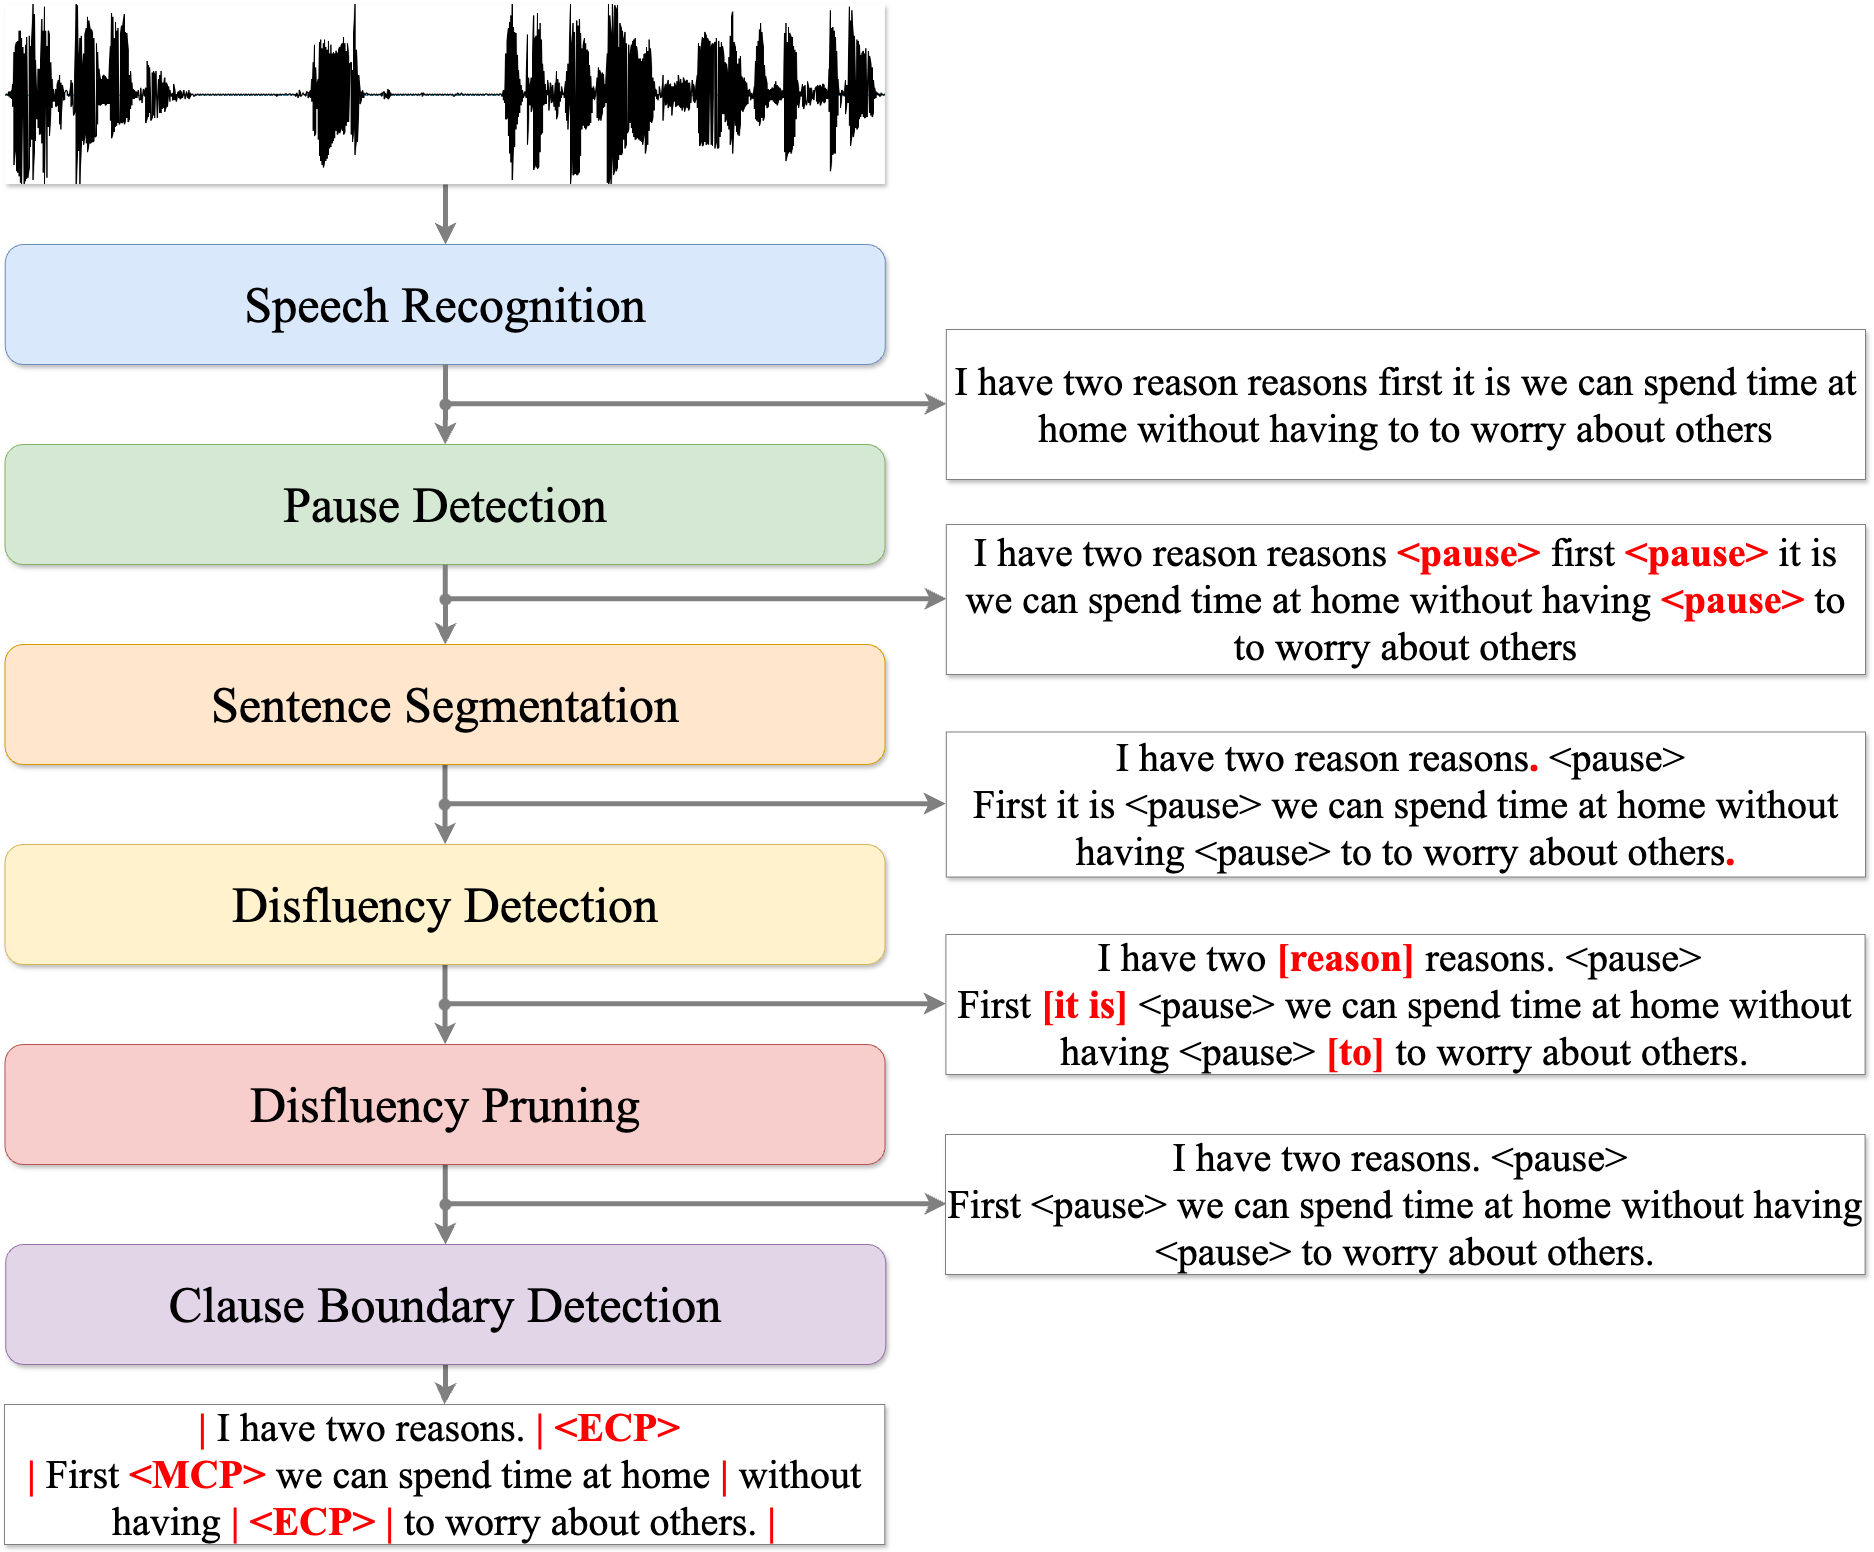

In [5]:
IPython.display.Image(
    "/Users/ryuki/Development/FluencyFeatureAnnotator/src/fluencyfeatureannotator/fig/annotation_procedures.png"
)

To annotate fluency features, use `FluencyFeatureAnnotator` class.

In [6]:
annotator = FluencyFeatureAnnotator()

Downloading: "https://dl.fbaipublicfiles.com/mms/torchaudio/ctc_alignment_mling_uroman/model.pt" to /Users/ryuki/.cache/torch/hub/checkpoints/model.pt
100%|██████████| 1.18G/1.18G [04:31<00:00, 4.65MB/s]
/Users/ryuki/Development/FluencyFeatureAnnotator/.venv/lib/python3.9/site-packages/transformers/modeling_utils.py:461: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend

RoBERTa model was selected!


Some weights of the model checkpoint at FacebookAI/roberta-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/Users/ryuki/Development/FluencyFeatureAnnotator/src/fluencyfeatureannotator/modules/models/utils/base.py:277: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct m

The following code block shows how to annotate all features. The outputs of `annotate` method is lists of `Turn` object and `TextGrid` object.

In [7]:
wav_file_path_list = [SAMPLE_WAV_FILE]
txt_file_path_list = [SAMPLE_TXT_FILE]

turn_list, grid_list = annotator.annotate(wav_file_path_list, txt_file_path_list)
turn = turn_list[0]
grid = grid_list[0]

/Users/ryuki/Development/FluencyFeatureAnnotator/src/fluencyfeatureannotator/modules/common/turn.py:147: UserWarning: specified idx 43 is end word of clause
  warn(f"specified idx {idx} is end word of clause")
/Users/ryuki/Development/FluencyFeatureAnnotator/src/fluencyfeatureannotator/modules/common/turn.py:147: UserWarning: specified idx 50 is end word of clause
  warn(f"specified idx {idx} is end word of clause")


### 2.1. Turn

`Turn` object is a list of `Clause` object, which is a list of `Word` and `DisfluencyWord` object.
The following code block shows how to access `Clause` objects from `Turn`.

In [8]:
for clause in turn.clauses:
    clause.show_info()

clause[000]: i prefer (0.547:0.734)
clause[001]: relaxing at home on weekends (0.800:1.541)
clause[002]: i have two reasons (1.914:2.274)
clause[003]: first we can spend time at home (2.548:3.508)
clause[004]: without having (3.561:3.835)
clause[005]: to worry about others (3.962:4.542)
clause[006]: the whole (4.942:5.122)
clause[007]: we can use the time for hobbies (5.396:6.149)
clause[008]: second s we will get a better rest (6.683:7.456)
clause[009]: than praying aside (7.697:8.057)
clause[010]: we must be tired or praying outside (8.577:9.337)
clause[011]: even though we are on vacation (9.404:10.251)
clause[012]: some people may think (10.765:11.191)
clause[013]: that we should get some exercise on the weekend (11.218:12.432)
clause[014]: however the bible bio race are not good to earth (12.985:14.646)
clause[015]: and we might get (15.020:15.507)
clause[016]: hard (15.547:15.667)
clause[017]: by praying outside (15.807:16.173)
clause[018]: in conclusion i prefer (16.840:17.547)


The following code block shows how to access `Word` object from `Turn`.

In [9]:
for word in turn.words:
    if word.idx > 10:
        break

    word.show_info()

word[000]: i (0.547:0.554)
word[001]: prefer (0.600:0.734)
word[002]: relaxing (0.800:0.987)
word[003]: at (1.014:1.067)
word[004]: home (1.094:1.187)
word[005]: on (1.287:1.321)
word[006]: weekends (1.354:1.541)
word[007]: i (1.914:1.921)
word[008]: have (1.934:1.994)
word[009]: two (2.014:2.068)
word[010]: reasons (2.094:2.274)


You also can access `Word` objects from `Clause`.

In [10]:
for clause in turn.clauses:
    for word in clause.words:
        word.show_info()
    break

word[000]: i (0.547:0.554)
word[001]: prefer (0.600:0.734)


`Turn` object has two modes: showing disfluency and ignoring disfluency modes.
If you would like to switch to showing dislfuency mode, use `show_disfluency` method.

In [11]:
turn.show_disfluency()
for clause in turn.clauses:
    clause.show_info()

clause[000]: i prefer (0.547:0.734)
clause[001]: relaxing at home on weekends (0.800:1.541)
clause[002]: i have two reasons (1.914:2.274)
clause[003]: first we can spend time at home (2.548:3.508)
clause[004]: without having (3.561:3.835)
clause[005]: to worry about others (3.962:4.542)
clause[006]: the whole (4.942:5.122)
clause[007]: we can use the time for hobbies (5.396:6.149)
clause[008]: second s we will get a better rest (6.683:7.456)
clause[009]: than praying aside (7.697:8.057)
clause[010]: we must be tired or praying outside (8.577:9.337)
clause[011]: even though we are on vacation (9.404:10.251)
clause[012]: some people may think (10.765:11.191)
clause[013]: that we should get some exercise on the weekend (11.218:12.432)
clause[014]: however the bible bio race are not good to earth (12.985:14.646)
clause[015]: and we might get (15.020:15.507)
clause[016]: hard (15.547:15.667)
clause[017]: by praying outside (15.807:16.173)
clause[018]: in conclusion i prefer (16.840:17.547)


If you would like to switch to ignoring dislfuency mode, use `ignore_disfluency` method.

In [12]:
turn.ignore_disfluency()
for clause in turn.clauses:
    clause.show_info()

clause[000]: i prefer (0.547:0.734)
clause[001]: relaxing at home on weekends (0.800:1.541)
clause[002]: i have two reasons (1.914:2.274)
clause[003]: first we can spend time at home (2.548:3.508)
clause[004]: without having (3.561:3.835)
clause[005]: to worry about others (3.962:4.542)
clause[006]: the whole (4.942:5.122)
clause[007]: we can use the time for hobbies (5.396:6.149)
clause[008]: second s we will get a better rest (6.683:7.456)
clause[009]: than praying aside (7.697:8.057)
clause[010]: we must be tired or praying outside (8.577:9.337)
clause[011]: even though we are on vacation (9.404:10.251)
clause[012]: some people may think (10.765:11.191)
clause[013]: that we should get some exercise on the weekend (11.218:12.432)
clause[014]: however the bio race are not good to earth (12.985:14.646)
clause[015]: and we might get (15.020:15.507)
clause[016]: hard (15.547:15.667)
clause[017]: by praying outside (15.807:16.173)
clause[018]: in conclusion i prefer (16.840:17.547)
clause

### 2.2. TextGrid

`TextGrid` object is applied from `praat-textgrids` package.
This is dict-like object, and it has `Tier` objects.

The annotaed `TextGrid` has seven tiers.

In [13]:
for tier_name in grid.keys():
    print(tier_name)

transcript
pause
filler
disflu
rep
self
false
